In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import geopandas

%matplotlib notebook

In [2]:
path = "./SLT_16B_Files/"
ph1 = geopandas.GeoDataFrame.from_file(path + "gadm36_PHL_1.shp")

Read Overvoters per Province

In [3]:
ov_prov = pd.read_csv(path + "PH-Elections-2019_Overvote-Ballots-per-Province.csv")
ov_prov.head(1)

Province   expected-voters    number-of-voters-who-actually-voted   \
0  AGUSAN DEL NORTE             477659                                 392063   

    overvote-ballots   Rank_EV  Rank_Voted  Rank_OV  
0               34640       39          35       45

Read Transformation Data for Province

In [4]:
trans_prov = pd.read_csv(path + "PH-Elections-2019_SHP-PROVINCE.csv")
trans_prov.head(1)

NAME_1 Province
0   Abra     ABRA

In [5]:
ph_1_update = ph1.merge(trans_prov,left_on='NAME_1', right_on='NAME_1')
ph_1_update = ph_1_update.merge(ov_prov,left_on='Province', right_on='Province')

ph_1_update.columns = ['GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'geometry', 'Province',
       'Expected_Voters', 'Actual_Voters',
       'Overvote_Ballots', 'Rank_EV', 'Rank_Voted', 'Rank_OV']
ph_1_update.columns

Index(['GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'geometry', 'Province',
       'Expected_Voters', 'Actual_Voters', 'Overvote_Ballots', 'Rank_EV',
       'Rank_Voted', 'Rank_OV'],
      dtype='object')

In [6]:
ph_1_update.head(2)

GID_0       NAME_0    GID_1            NAME_1 VARNAME_1 NL_NAME_1  \
0   PHL  Philippines  PHL.2_1  Agusan del Norte      None      None   
1   PHL  Philippines  PHL.3_1    Agusan del Sur      None      None   

                TYPE_1 ENGTYPE_1  CC_1 HASC_1  \
0  Lalawigan|Probinsya  Province  1602  PH.AN   
1  Lalawigan|Probinsya  Province  1603  PH.AS   

                                            geometry          Province  \
0  POLYGON ((125.4462738 8.66631031, 125.44199371...  AGUSAN DEL NORTE   
1  POLYGON ((125.90923309 7.9984498, 125.90175629...    AGUSAN DEL SUR   

   Expected_Voters  Actual_Voters  Overvote_Ballots  Rank_EV  Rank_Voted  \
0           477659         392063             34640       39          35   
1           423230         336189             40294       46          41   

   Rank_OV  
0       45  
1       38

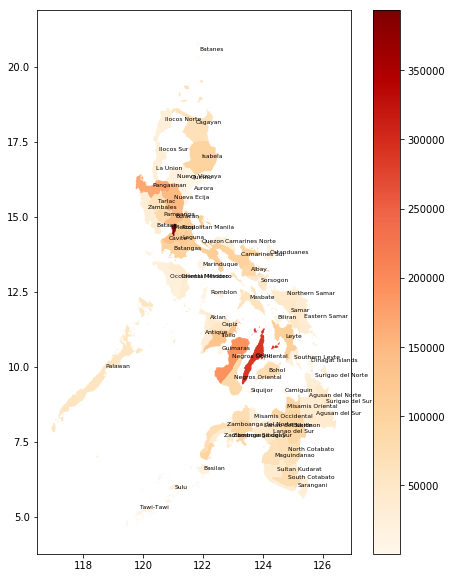

In [7]:
colors = 2
ax = ph_1_update.plot(column='Overvote_Ballots', 
                      cmap='OrRd', figsize=(8, 10), k=colors, legend=True)

for ind, row in ph_1_update[ph_1_update["NAME_0"] == "Philippines"].iterrows():
    ax.text(row["geometry"].centroid.x,row["geometry"].centroid.y, row["NAME_1"], fontsize=6)

In [8]:
ph_1_update.NAME_1.unique()

array(['Agusan del Norte', 'Agusan del Sur', 'Aklan', 'Albay', 'Antique',
       'Aurora', 'Basilan', 'Bataan', 'Batanes', 'Batangas', 'Biliran',
       'Bohol', 'Bukidnon', 'Bulacan', 'Cagayan', 'Camarines Norte',
       'Camarines Sur', 'Camiguin', 'Capiz', 'Catanduanes', 'Cavite',
       'Cebu', 'Dinagat Islands', 'Eastern Samar', 'Guimaras',
       'Ilocos Norte', 'Ilocos Sur', 'Iloilo', 'Isabela', 'La Union',
       'Laguna', 'Lanao del Norte', 'Lanao del Sur', 'Leyte',
       'Maguindanao', 'Marinduque', 'Masbate', 'Metropolitan Manila',
       'Misamis Occidental', 'Misamis Oriental', 'Negros Occidental',
       'Negros Oriental', 'North Cotabato', 'Northern Samar',
       'Nueva Ecija', 'Nueva Vizcaya', 'Occidental Mindoro',
       'Oriental Mindoro', 'Palawan', 'Pampanga', 'Pangasinan', 'Quezon',
       'Quirino', 'Rizal', 'Romblon', 'Samar', 'Sarangani', 'Siquijor',
       'Sorsogon', 'South Cotabato', 'Southern Leyte', 'Sultan Kudarat',
       'Sulu', 'Surigao del Norte', 'S

Plot of National Level Results

In [9]:
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D 

In [10]:
sen_natl = pd.read_csv(path + "PH-Elections-2019_Sim_Senator_Results_Natl_act_ov.csv")
sen_natl.columns = ['Senatorial_Candidate', 'Actual_Votes', 'With_Overvotes', 'Rank_AV', 'Rank_OV']
sen_natl['Overvotes'] = sen_natl['With_Overvotes'] - sen_natl['Actual_Votes']
sen_natl.head(1)

Senatorial_Candidate  Actual_Votes  With_Overvotes  Rank_AV  Rank_OV  \
0                     1        601611          603127       40       40   

   Overvotes  
0       1516

In [11]:
sen_names = pd.read_csv(path + "PH-Elections-2019_Senatoriables_Data.csv")
sen_names.head(1)
sen_natl_update = sen_natl.merge(sen_names, left_on="Senatorial_Candidate", right_on="boc")
sen_natl_update = sen_natl_update.drop('boc', axis=1)
sen_natl_update.columns = ['Senatorial_Candidate', 'Actual_Votes', 'With_Overvotes', 'Rank_AV',
       'Rank_OV', 'Overvotes', 'NAME', 'PARTY']
sen_natl_update.head(1)

Senatorial_Candidate  Actual_Votes  With_Overvotes  Rank_AV  Rank_OV  \
0                     1        601611          603127       40       40   

   Overvotes                 NAME        PARTY  
0       1516  ABEJO, VANGIE (IND)  LGBTQ PARTY

In [12]:

countries = sen_natl_update.NAME.tolist()
sen_actual_plus_over_votes = (sen_natl_update['With_Overvotes']/1000000).to_list()
sen_actual_votes = (sen_natl_update.Actual_Votes/1000000).to_list()
life_expectancies = sen_natl_update.Overvotes.to_list()

data = {'sen_actual_plus_over_vote' : pd.Series(sen_actual_plus_over_votes, index=countries), 
        'sen_actual_vote' : pd.Series(sen_actual_votes, index=countries),
        'life expectancy' : pd.Series(life_expectancies, index=countries)}

Actual Votes - Senatorial Race

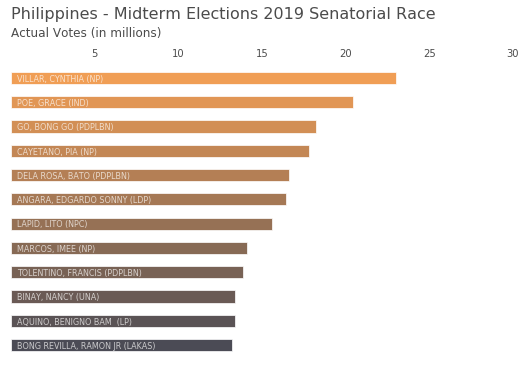

In [13]:
# Select Top 12
df = pd.DataFrame(data)
df = df.sort_values('sen_actual_vote', ascending=True)
df = df.tail(12)

# Create a figure of given size
fig = plt.figure(figsize=(9,6))
# Add a subplot
ax = fig.add_subplot(111)
# Set title
ttl = 'Philippines - Midterm Elections 2019 Senatorial Race'

# Set color transparency (0: transparent; 1: solid)
a = 0.7
# Create a colormap
customcmap = [(x*2/24.0,  x*2/48.0, 0.05) for x in range(len(df))]
# Plot the 'sen_actual_vote' column as horizontal bar plot
df['sen_actual_vote'].plot(kind='barh', ax=ax, alpha=a, legend=False, color=customcmap,
                      edgecolor='w', xlim=(0,max(df['sen_actual_vote'])), title=ttl)

# Remove grid lines (dotted lines inside plot)
ax.grid(False)
# Remove plot frame
ax.set_frame_on(False)

# Customize title, set position, allow space on top of plot for title
ax.set_title(ax.get_title(), fontsize=16, alpha=a, ha='left')
plt.subplots_adjust(top=0.8)
ax.title.set_position((0,1.14))

# Set x axis label on top of plot, set label text
ax.xaxis.set_label_position('top')
xlab = 'Actual Votes (in millions)'
ax.set_xlabel(xlab, fontsize=12, alpha=a, ha='left')
ax.xaxis.set_label_coords(0, 1.10)

# Position x tick labels on top
ax.xaxis.tick_top()
# Remove tick lines in x and y axes
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Customize x tick lables
xticks = [5,10,15,20,25,30]
ax.xaxis.set_ticks(xticks)
ax.set_xticklabels(xticks, fontsize=10, alpha=a)

# Customize y tick labels
yticks = [item.get_text() for item in ax.get_yticklabels()]
ax.set_yticklabels(yticks, fontsize=8, alpha=a, ha='left', color='white', )
ax.yaxis.set_tick_params(pad=-10) 

Actual Votes plus Overvotes - Senatorial Race

In [14]:
# Select Top 12
df = pd.DataFrame(data)
df = df.sort_values('sen_actual_plus_over_vote', ascending=True)
df = df.tail(12)

# Create a figure of given size
fig = plt.figure(figsize=(9,6))
# Add a subplot
ax = fig.add_subplot(111)
# Set title
ttl = 'Philippines - Midterm Elections 2019 Senatorial Race'

# Set color transparency (0: transparent; 1: solid)
a = 0.7
# Create a colormap
customcmap = [(x*2/24.0,  x*2/48.0, 0.05) for x in range(len(df))]
# Plot the 'sen_actual_plus_over_vote' column as horizontal bar plot
df['sen_actual_plus_over_vote'].plot(kind='barh', ax=ax, alpha=a, legend=False, color=customcmap,
                      edgecolor='w', xlim=(0,max(df['sen_actual_plus_over_vote'])), title=ttl)

# Remove grid lines (dotted lines inside plot)
ax.grid(False)
# Remove plot frame
ax.set_frame_on(False)

# Customize title, set position, allow space on top of plot for title
ax.set_title(ax.get_title(), fontsize=16, alpha=a, ha='left')
plt.subplots_adjust(top=0.8)
ax.title.set_position((0,1.14))

# Set x axis label on top of plot, set label text
ax.xaxis.set_label_position('top')
xlab = 'Actual Votes plus Overvotes (in millions)'
ax.set_xlabel(xlab, fontsize=12, alpha=a, ha='left')
ax.xaxis.set_label_coords(0, 1.10)

# Position x tick labels on top
ax.xaxis.tick_top()
# Remove tick lines in x and y axes
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Customize x tick lables
xticks = [5,10,15,20,25,30]
ax.xaxis.set_ticks(xticks)
ax.set_xticklabels(xticks, fontsize=10, alpha=a)

# Customize y tick labels
yticks = [item.get_text() for item in ax.get_yticklabels()]
ax.set_yticklabels(yticks, fontsize=8, alpha=a, ha='left', color='white', )
ax.yaxis.set_tick_params(pad=-10) 